**Agrupamento Kmeans**

In [28]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
import pandas as pd
from sklearn.metrics import davies_bouldin_score
from minisom import MiniSom
from scipy.spatial.distance import cdist

In [29]:
data= pd.read_csv('iris.csv')
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
entry = data.iloc[:, 0:4].values
entry.shape

(150, 4)

In [31]:
scaler = MinMaxScaler()
entry = scaler.fit_transform(entry)

In [32]:
entry

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

**Silhouette**

- https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [33]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = int((entry.shape[0]//2)**0.5)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(entry)
    pred = model.predict(entry)
    score = silhouette_score(entry, pred)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

Silhouette Score k = 2: 0.629
Silhouette Score k = 3: 0.504
Silhouette Score k = 4: 0.445
Silhouette Score k = 5: 0.353
Silhouette Score k = 6: 0.347
Silhouette Score k = 7: 0.344
Silhouette Score k = 8: 0.323


**WCSS**

- Within Clusters Sum of Squares
- (Soma dos quadrados dentro dos clusters)

https://rpubs.com/diascodes/770518
https://en.wikipedia.org/wiki/Elbow_method_(clustering)

In [34]:
wcss = []
for i in range(2, 11):
  #print(i)
  kmeans = KMeans(n_clusters=i, random_state=10)
  kmeans.fit(entry)
  wcss.append(kmeans.inertia_)

/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

**Método Elbow**

- Determinar o número de clusters


In [35]:
wcss

[12.14368828157972,
 6.998114004826762,
 5.532831003081897,
 4.580066071039319,
 3.9297268423415015,
 3.4750340333223813,
 3.129589848164076,
 2.810253627005429,
 2.5315649974148102]

- Plotando o gráfico

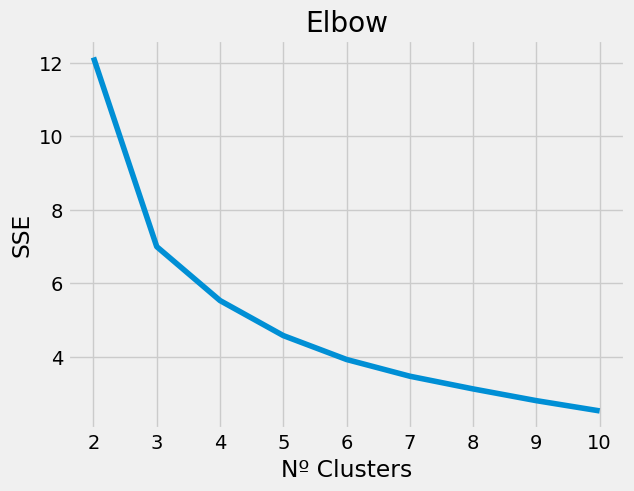

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), wcss)
plt.xticks(range(2, 11))
plt.title('Elbow')
plt.xlabel("Nº Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

4

**Índice de Dunn**

- Maximizar a distância entre clusters e minimizar o tamanho dos clusters
- Quanto maior o índice --> melhor

Índice de Dunn: 5.999999999999999


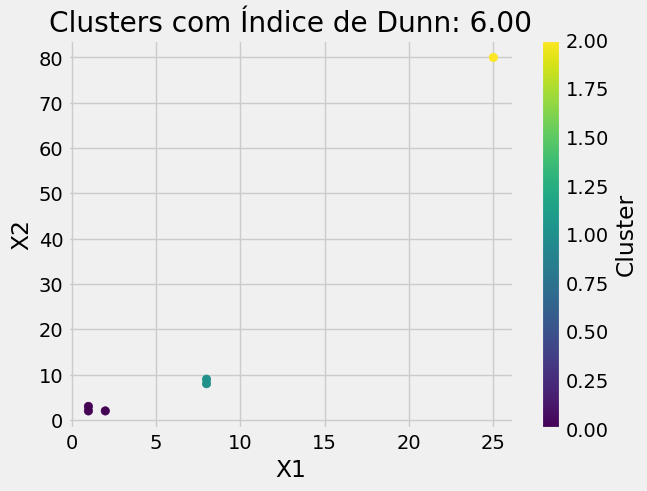

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Função para calcular o índice de Dunn
def dunn_index(X, labels):
    clusters = np.unique(labels)

    def cluster_diameter(cluster_points):
        if len(cluster_points) < 2:
            return 0
        distances = cdist(cluster_points, cluster_points)
        return np.max(distances)

    def inter_cluster_distance(cluster_points_i, cluster_points_j):
        if len(cluster_points_i) == 0 or len(cluster_points_j) == 0:
            return np.inf
        distances = cdist(cluster_points_i, cluster_points_j)
        return np.min(distances)

    max_diameter = 0
    for cluster in clusters:
        cluster_points = X[labels == cluster]
        max_diameter = max(max_diameter, cluster_diameter(cluster_points))

    min_inter_cluster_dist = np.inf
    for i, cluster_i in enumerate(clusters):
        for cluster_j in clusters[i+1:]:
            cluster_points_i = X[labels == cluster_i]
            cluster_points_j = X[labels == cluster_j]
            min_inter_cluster_dist = min(min_inter_cluster_dist, inter_cluster_distance(cluster_points_i, cluster_points_j))

    if max_diameter == 0:
        return np.inf
    else:
        return min_inter_cluster_dist / max_diameter

# Exemplo de uso para o cálculo e plotagem do índice de Dunn
X = np.array([[1, 2], [2, 2], [1, 3], [8, 8], [8, 9], [25, 80]])
labels = np.array([0, 0, 0, 1, 1, 2])  # rótulos dos clusters

dunn_value = dunn_index(X, labels)
print("Índice de Dunn:", dunn_value)

# Plotando os clusters para visualização
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", marker="o")
plt.title(f"Clusters com Índice de Dunn: {dunn_value:.2f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar(label="Cluster")
plt.show()


In [39]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=3, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(entry)

/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Kmeans')

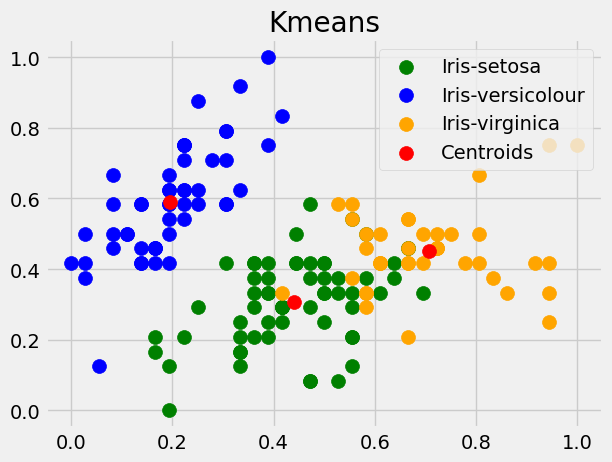

In [46]:
#Visualising the clusters
plt.scatter(entry[saida_kmeans == 0, 0], entry[saida_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(entry[saida_kmeans == 1, 0], entry[saida_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(entry[saida_kmeans == 2, 0], entry[saida_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.title('Kmeans')

**DBSCAN**

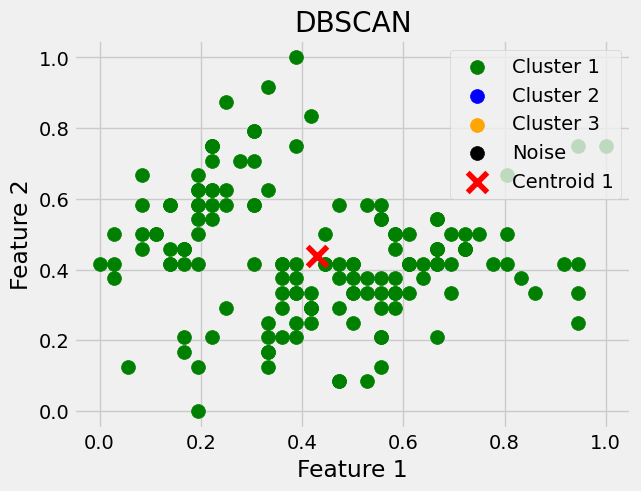

In [45]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Definindo os parâmetros
saida_dbscan = dbscan.fit_predict(entry)

# Visualizando os clusters
plt.scatter(entry[saida_dbscan == 0, 0], entry[saida_dbscan == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(entry[saida_dbscan == 1, 0], entry[saida_dbscan == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(entry[saida_dbscan == 2, 0], entry[saida_dbscan == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')

# Para pontos que foram classificados como ruído (-1 em DBSCAN)
plt.scatter(entry[saida_dbscan == -1, 0], entry[saida_dbscan == -1, 1], s = 100, c = 'black', label = 'Noise')

# Plotando os centros dos clusters (não aplicável ao DBSCAN, mas podemos usar médias)
# A DBSCAN não possui centroides definidos como o KMeans, mas podemos calcular as médias dos clusters
for i in set(saida_dbscan):
    if i != -1:
        centroid = entry[saida_dbscan == i].mean(axis=0)
        plt.scatter(centroid[0], centroid[1], s = 200, c = 'red', marker='x', label=f'Centroid {i+1}')

plt.legend()
plt.title('DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**SOM**

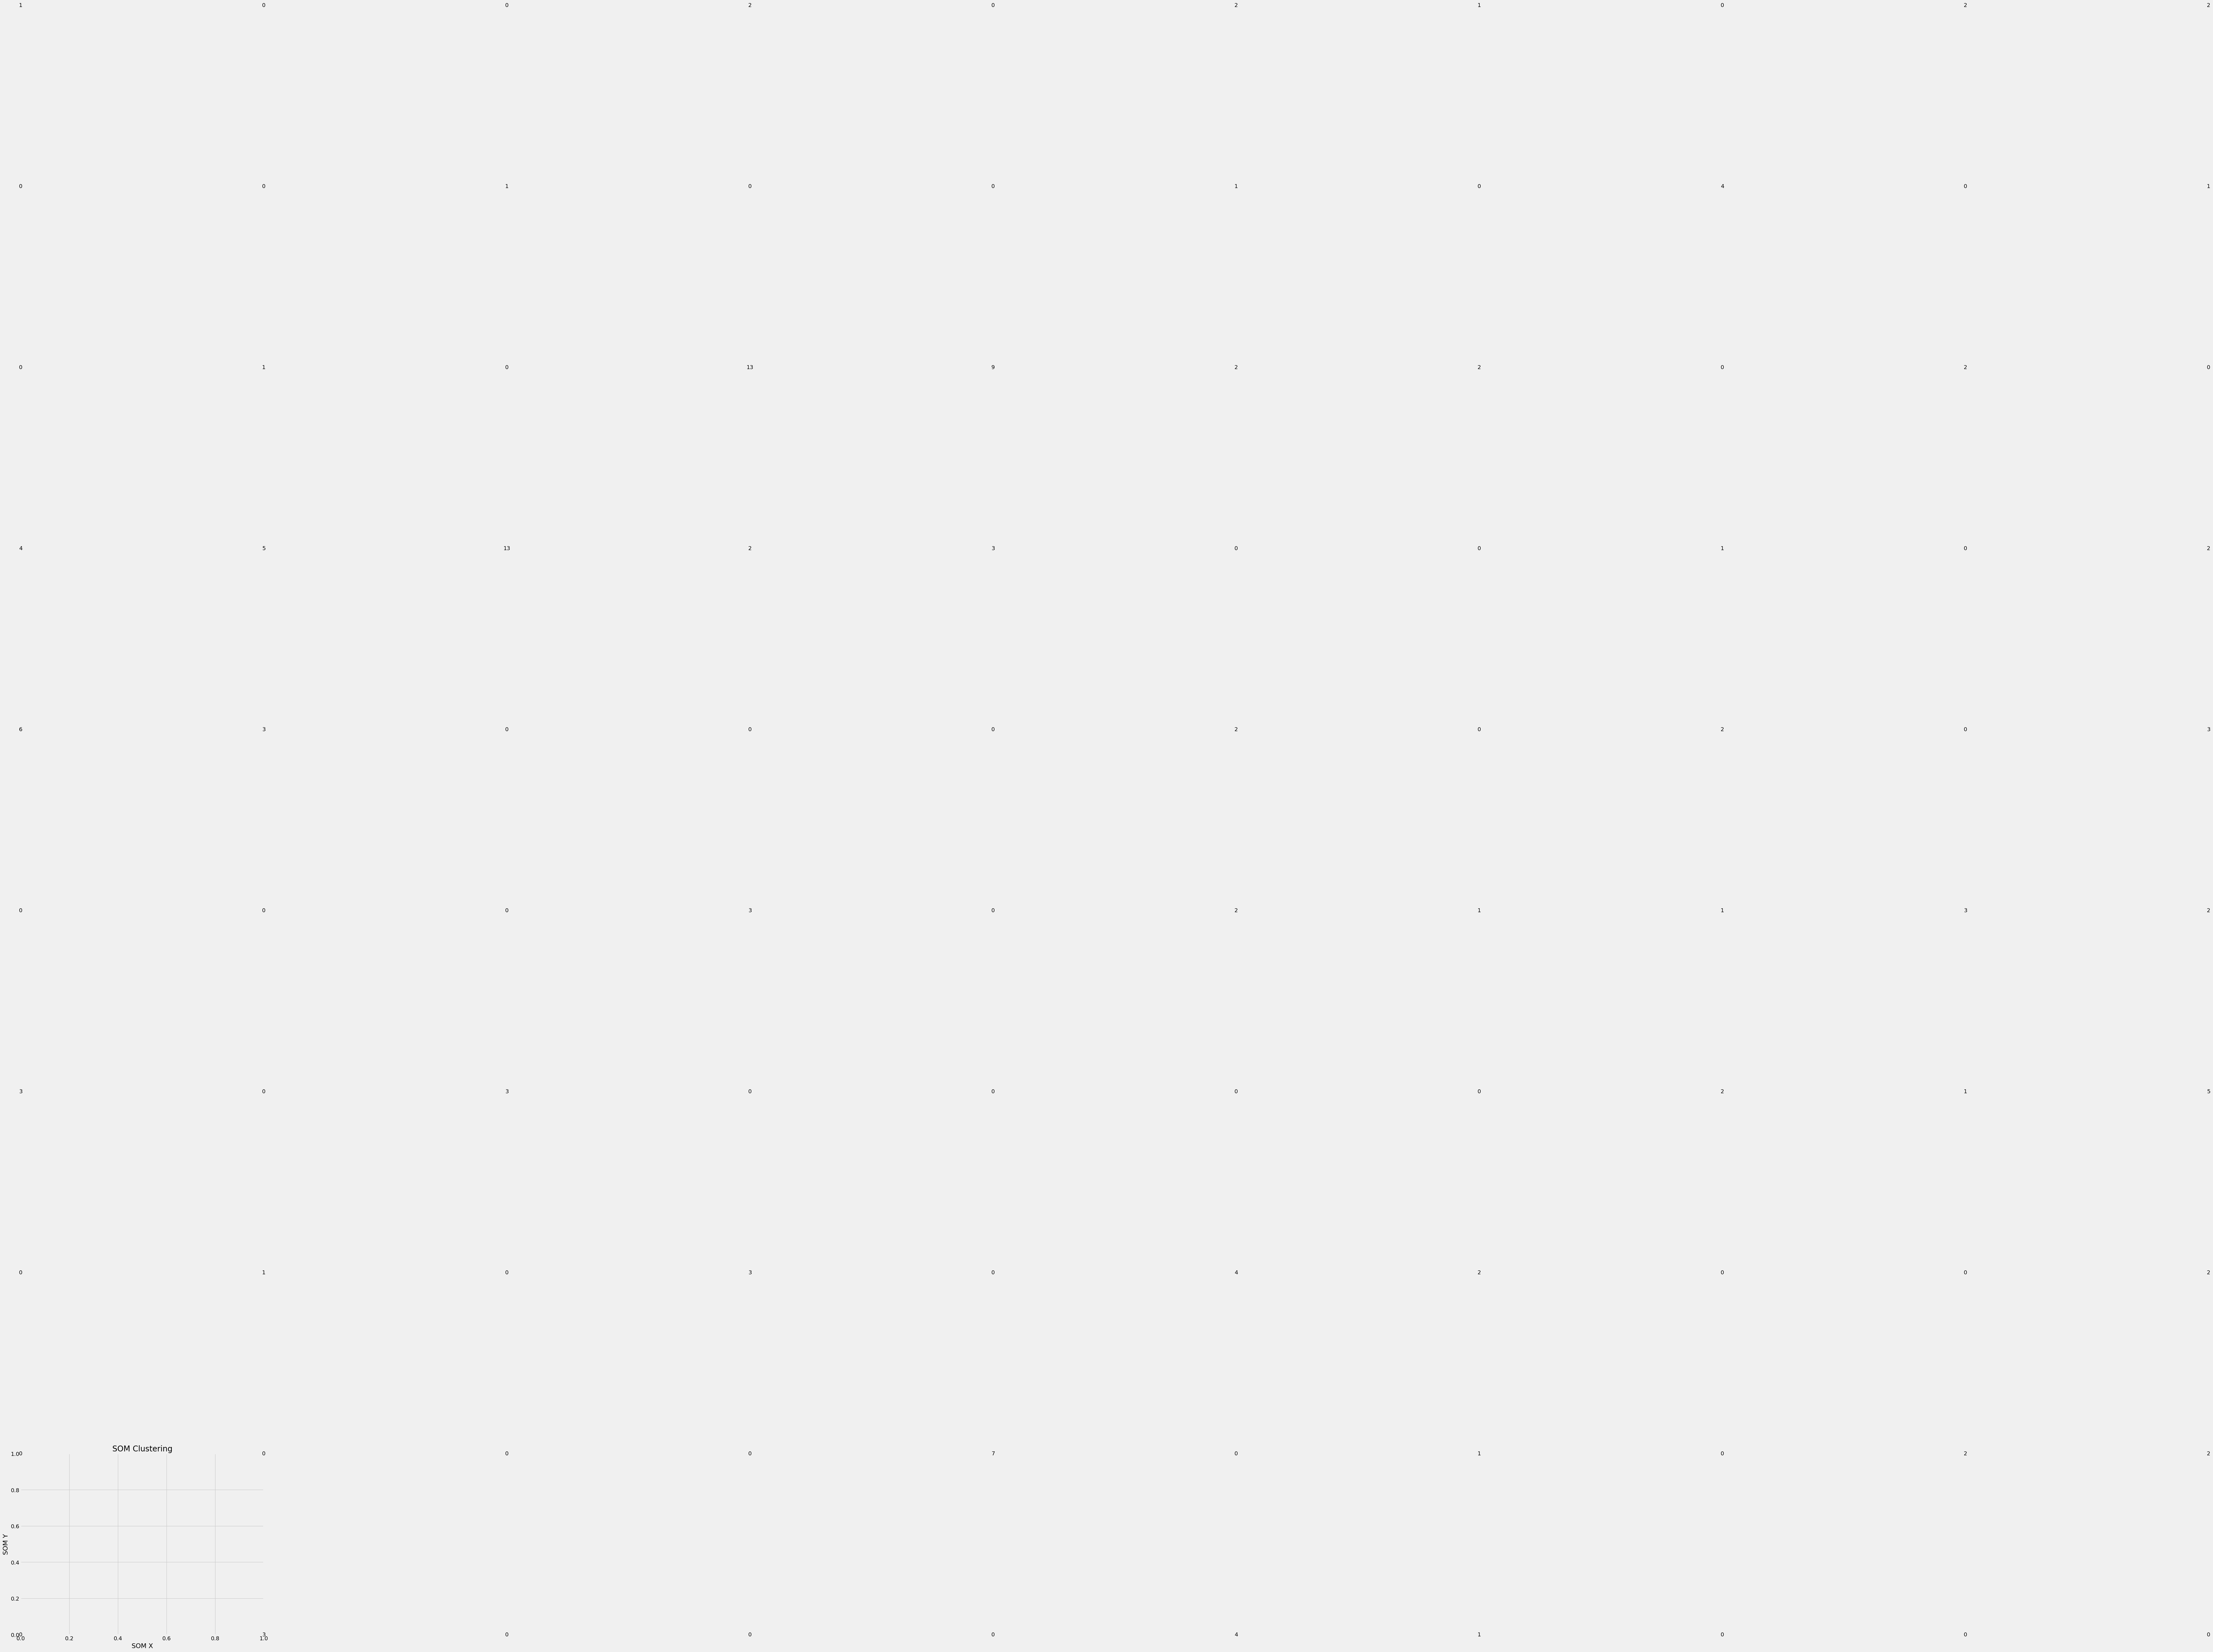

In [42]:
# Inicializando e treinando o SOM
som = MiniSom(x=10, y=10, input_len=entry.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(entry)  # Inicialização aleatória dos pesos
som.train_batch(entry, 100)  # Treinamento com 100 iterações

# Visualizando o SOM: mapear as células e os clusters
# Pegando a posição vencedora (neuronio vencedor) para cada ponto
win_map = som.win_map(entry)

# Plotando os resultados do SOM
plt.figure(figsize=(10, 8))
for x in range(10):
    for y in range(10):
        # Mostrando quantos pontos estão em cada célula do SOM
        plt.text(x, y, f'{len(win_map[(x, y)])}', color='black', ha='center', va='center')

plt.title('SOM Clustering')
plt.xlabel('SOM X')
plt.ylabel('SOM Y')
plt.grid(True)
plt.show()

**Instancias incorretas KMEANS**

/home/bibs/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


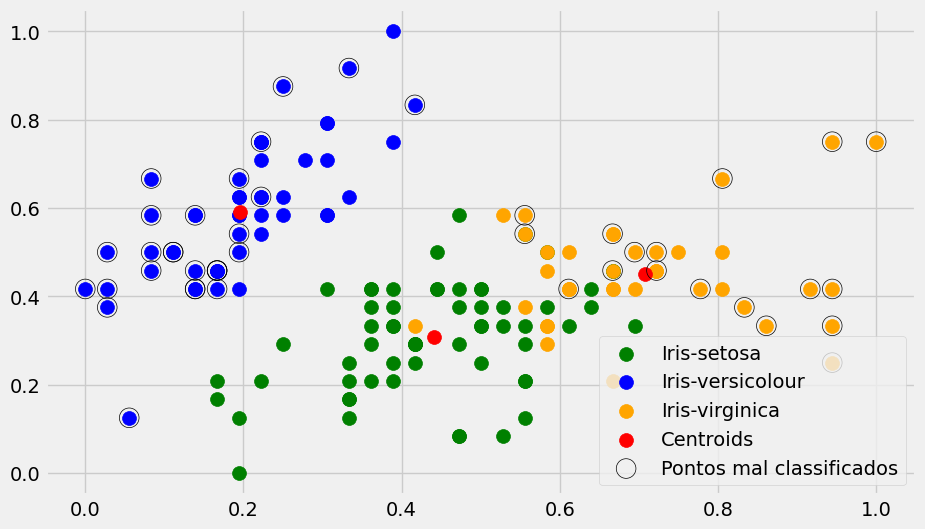

In [47]:
# Aplicando K-means
kmeans = KMeans(n_clusters=3, random_state=0)
saida_kmeans = kmeans.fit_predict(entry)

# Calculando a distância de cada ponto ao centro do cluster mais próximo
distancias = cdist(entry, kmeans.cluster_centers_, 'euclidean')

# Identificando os pontos mal classificados (distâncias grandes)
limite_distancia = np.percentile(distancias, 90)  # Usando o percentil 90 como limite
instancias_incorretas = distancias.max(axis=1) > limite_distancia

# Visualizando os clusters e as instâncias mal classificadas
plt.figure(figsize=(10, 6))
plt.scatter(entry[saida_kmeans == 0, 0], entry[saida_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(entry[saida_kmeans == 1, 0], entry[saida_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(entry[saida_kmeans == 2, 0], entry[saida_kmeans == 2, 1], s = 100, c = 'orange', label = 'Iris-virginica')

# Plotando os centros dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

# Destacando as instâncias mal classificadas com uma cor diferente
plt.scatter(entry[instancias_incorretas, 0], entry[instancias_incorretas, 1], s = 200, facecolors='none', edgecolors='black', label='Pontos mal classificados')

plt.legend()
plt.show()